# **Data Argumentation**


---
---
#####October 16th, 2020
---

A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:

*   Introducing disturbances in the original data. **For example**: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. **Example**: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

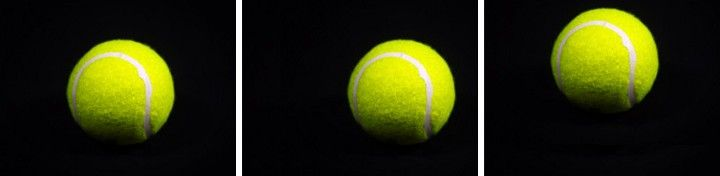



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.
---
* **Rescale**: rescale factor. Defaults to none of them. If Zero, no rescaling is used, otherwise we can multiply the data by the value given (after applying all other transformations).

* **shear range: float**: Cutting intensity (counterclockwise cutting angle in degrees).

* **fill_mode**: Interpolation mode, options are \ {"constant", "closest", "reflect" or "wrap" \}. Points outside the borders are filled in according to the following rules:

    * 'constant': kkkkkkkk | abcd | kkkkkkkk (cval = k)

    * 'nearest': aaaaaaaa | abcd | dddddddd

    * 'mirror': abcddcba | abcd | dcbaabcd
   
    * 'wrap': abcdabcd | abcd | abcdabcd
   
    * where cval: `float` or ʻint` is the value used for padding

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [86]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image ##python image library
from urllib.request import urlopen #Lets you read an email address

## **First we upload an image from the internet**


---



---



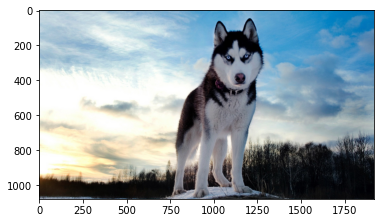

In [87]:
url = 'http://getwallpapers.com/wallpaper/full/3/5/3/151864.jpg'
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

### **height_shift_range**


---



Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The **width_shift_range and height_shift_range** arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


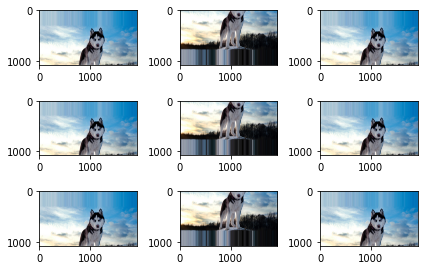

In [88]:
# We convert the image to an arrangement
data = img_to_array(img)
# We make an expansion to a sample 
samples = expand_dims(data, 0)
# We create the data augmenter using only makeover 
datagen = ImageDataGenerator(height_shift_range=[-300,300])
# We prepare the iterator
it = datagen.flow(samples, batch_size=1)
# We generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# Generated lots of images
	batch = it.next()
	image = batch[0].astype('uint8') #Is converted to a valid value so that it can be displayed as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()

### **width_shift_range**


---



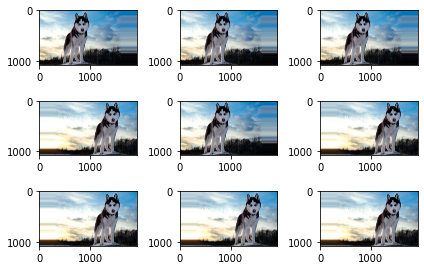

In [89]:
#additional 
datagen = ImageDataGenerator(width_shift_range =[-300,300])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8') 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively. Magnification is specified by a **horizontal_flip** or **vertical_flip** Boolean argument for the **ImageDataGenerator class.**

### **horizontal_flip** 


---



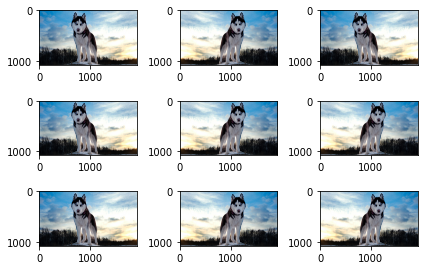

In [90]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()



### **vertical_flip**
---



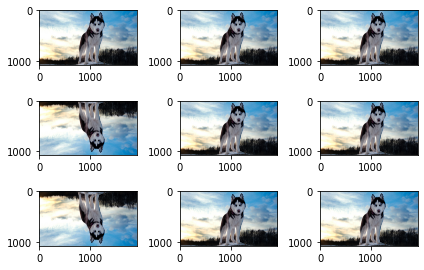

In [91]:
#additional 
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

### **Zoom_range**

---

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

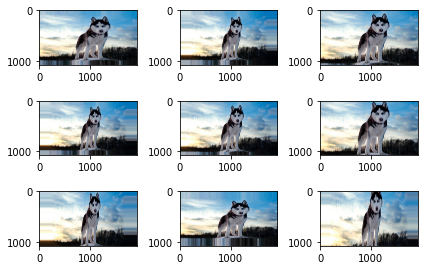

In [92]:
datagen = ImageDataGenerator(zoom_range=0.4) #float o Range [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

### **rotation_range**


---



The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

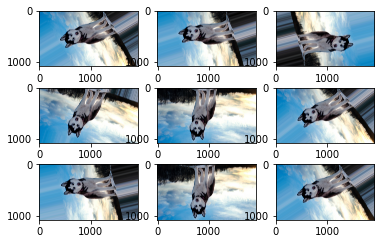

In [93]:
datagen = ImageDataGenerator(rotation_range=270)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.


              featurewise_center: Boolean, set the mean of each element to zero of all data.
              samplewise_center: Boolean, set the mean of each     sample to zero
              featurewise_std_normalization: Boolean, Divide the entries by the standard deviation (std.) Of the data set, based on characteristics.
              samplewise_std_normalization: Boolean, divide each data by its std.
              zca_epsilon: The default is 1e-6.
              zca_whitening: Boolean, indicates if ZCA bleaching is applied.

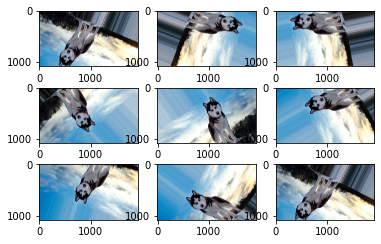

In [94]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [150,150],   
            height_shift_range           = [-200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

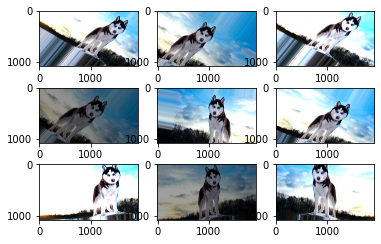

In [95]:
#additional 

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
rescale=0/10,
brightness_range=[0.5,2],
fill_mode="nearest")

it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now that we consider words, the work required is not so simple given the inherent complexity of language (we can't replace every word with its synonym and even if we do, we run the risk of the meaning of the sentence changing completely. There are some libraries that can help us to do this task, we will start by looking at the following:


1.   Text Attack
2.   Google Trans

# **TextAttack**

---
---
It is a Python framework for opponent attacks, opponent training and data augmentation in NLP. We will focus only on data augmentation.

In [96]:
!pip install textattack

In [97]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [98]:
text = "Laugh as much as you breathe"

TextAttack provides us with four methods for data augmentation.


## **WordNetAugmenter**

---
---

Increases the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is an English lexical database. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept. WordNet superficially resembles a thesaurus, as it groups words according to their meaning.



In [100]:
aug = WordNetAugmenter();
aug.augment(text)

['Laugh as much as you suspire']


## **EmbeddingAugmenter**
---
---

 It increases the text by transforming words with their inlays, with a restriction to ensure that their cosine similarity is at least 0.8.


In [102]:
aug = EmbeddingAugmenter();
aug.augment(text)

['Laughed as much as you breathe']

## **CharSwapAugmenter**

---
___

Increase the text by replacing, deleting, inserting and exchanging adjacent characters.

In [103]:
aug = CharSwapAugmenter()
aug.augment(text)

['LVugh as much as you breathe']


## **EasyDataAugmenter**
---
---

This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes and synonym insertions. All 4 of these features occur randomly. Then we will get different results every time we execute the code. This returns 4 increased results, unlike the other methods.


In [104]:
aug = EasyDataAugmenter()
aug.augment(text)

['laughter as much as you breathe',
 'as as much Laugh you breathe',
 'Laugh as much A as you breathe',
 'Laugh as much you breathe']


---

Googletrans uses Google Translate's Ajax API for language detection and translation.

The key parameters for the **translate method ()** are:

1. **src**: source language. This parameter is optional as **googletrans** will detect it.

2. **dest**: target language. Mandatory parameter.

3. **text**: the text to be translated from the source language to the target language. Obligatory parameter.

When using this method what happens is a retranslation, we go from the original language to a target language and then back to the original. During this retranslation, there is a slight change in the sentence between the original text and the retranslated text, but the general meaning of the sentence is still preserved.


The supported languages are available at https://cloud.google.com/translate/docs/languages?hl=es

To get the best results it is recommended to do some tests with the languages, if the target language is very similar the translation does not lose information, however you can have the problem that the translation is too literal, this becomes a bit of a trial and error problem.


Some examples of languages:

* Afrikaans 'af'

* Chinese (simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ja'
* Latin 'la'

* English 'en'.

* Turkmen 'tk'

* Yiddish 'yi'

* Zulu 'zu'



In [105]:
!pip install googletrans

In [106]:
from googletrans import Translator
translator = Translator()

In [107]:
origin_text = "You cannot have negative mind and pretend that you'll be successful"
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

You cannot have negative mind and pretend that you'll be successful
Awunakuba nengqondo engemihle bese wenza sengathi uzophumelela
You can't be negative and pretend to succeed


In [108]:
origin_text = "You cannot have negative mind and pretend that you'll be successful"
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

You cannot have negative mind and pretend that you'll be successful
ネガティブな心を持ち、成功するふりをすることはできません
You can't pretend to be successful with a negative mind


In [109]:
origin_text = "You cannot have negative mind and pretend that you'll be successful"
text_trans = translator.translate(text=origin_text, dest='eo').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

You cannot have negative mind and pretend that you'll be successful
Vi ne povas havi negativan menson kaj ŝajnigi, ke vi sukcesos
You can’t have a negative mind and pretend you will succeed


In [110]:
origin_text = "You cannot have negative mind and pretend that you'll be successful"
text_trans = translator.translate(text=origin_text, dest='la').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

You cannot have negative mind and pretend that you'll be successful
Non potes habere negans quam simulare mentis et eris felix
You can not pretend to have a negative mind and I'll be happy
